In [ ]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                  
import cv2             
import tensorflow as tf                          
from PIL import Image                          
import os    
import json
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/ML Final Project/Colab/datafile"

/content/drive/.shortcut-targets-by-id/1UKmlnv56AciuvFxlMyNSXgaV23ugGklV/ML Final Project/Colab/datafile


In [ ]:
g = open('B100K/Image Examples/Lights_index/images_green_lights.txt', 'r')
green = g.readlines()
n = open('B100K/Image Examples/Lights_index/images_no_lights.txt', 'r')
no = n.readlines()
r = open('B100K/Image Examples/Lights_index/images_red_lights.txt', 'r')
red = r.readlines()
y = open('B100K/Image Examples/Lights_index/images_yellow_lights.txt', 'r')
yellow = y.readlines()
ls= green[:50] + no[:50] + red[:50] + yellow[:50]
len(ls)

200

In [ ]:
idx_folder = [i.strip('\n') for i in ls]
idx_folder

In [ ]:
f= open('B100K/Image Examples/Legacy/det_train.json', )
det_train_dict = json.load(f)
# dict_200 = all_lights_dict[:200]

In [ ]:
det_train_200 = []
for inx in idx_folder:
  for i in det_train_dict:
    if i['name'] == inx:
      # print(i)
      # for id_ in i['yellow_lights']:
      det_train_200.append(i)
det_train_200

In [ ]:
det_train_200[0]

In [ ]:
def read_json(dict_):
  # f = open(file_name, )
  # dict_ = json.load(f)

  def get_names():
    names = []
    for i in dict_:
      names.append(i['name'])
    return names

  def get_coordinates(img_name):
    box = []
    for i in dict_:
      if i['name'] == img_name:
        for id_ in i['labels']:
          box.append(id_['box2d'])
    return box

  def get_lights(img_name):
    lights = []
    for i in dict_:
      if i['name'] == img_name:
        for id_ in i['labels']:
          lights.append(id_['attributes']['trafficLightColor'])
    return lights

  img_names = get_names()
  coordinantes = [get_coordinates(i) for i in img_names]
  lights = [get_lights(i) for i in img_names]
  return img_names, coordinantes, lights

In [ ]:
names, coordinates, lights = read_json(det_train_200)

In [ ]:
import pickle
with open('data_preparation.pkl', 'wb') as pickle_out:
     pickle.dump(names, pickle_out)
     pickle.dump(coordinates, pickle_out)
     pickle.dump(lights, pickle_out)

In [ ]:
def box_annotation(img_name, coordinates, label):
  
  x1s, x2s, y1s, y2s = [], [], [], []
  for i, co in enumerate(coordinates):
    x_1 = x1s.append(int(co['x1']))
    y_1 = y1s.append(int(co['y1']))
    x_2 = x2s.append(int(co['x2']))
    y_2 = y2s.append(int(co['y2']))
    img = cv2.cvtColor(cv2.imread("datafile/trial20/"+img_name), cv2.COLOR_BGR2RGB)
  for i in range(len(x1s)):
    cv2.rectangle(img, (x1s[i], y1s[i]), (x2s[i], y2s[i]), (0, 255, 0), 2)

    ((label_width, label_height), _) = cv2.getTextSize('Yellow', fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75, thickness=2)
    cv2.rectangle(img,(x1s[i], y1s[i]), (int(x1s[i]+label_width*0.05), int(y1s[i] +label_height*0.25)), (0,255,0), cv2.FILLED)
    cv2.putText(img, label[i], org=(int(x1s[i]), int(y1s[i]+label_height-label_height*1.25)), fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75, color=(0,255,0), thickness=3)
    plt.imshow(img)

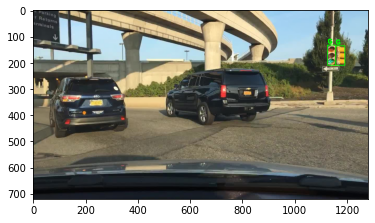

In [ ]:
box_annotation(names[0], coordinates[0], lights[0])  # example of annotation